In [124]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("data/vehicles/vehicles_messy.csv")
df.head()

In [83]:
df.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,37843.000000,37843.000000,37843.0,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,...,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000
mean,17.532506,0.216169,0.0,0.023531,17.941389,4.042737,0.520149,0.327163,0.000406,0.184790,...,22.587229,0.652380,33.619221,0.933845,2000.064398,-2658.999022,0.004360,0.069313,0.068203,0.068573
std,4.575950,1.141527,0.0,0.427647,6.660360,9.645820,3.837874,3.542596,0.039918,2.904558,...,9.350163,5.284547,10.048326,6.059456,10.390588,2553.098329,0.142776,1.966806,1.871986,1.913647
min,0.060000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1984.000000,-22250.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.000000,0.000000,27.100000,0.000000,1990.000000,-4250.000000,0.000000,0.000000,0.000000,0.000000
50%,17.347895,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.000000,0.000000,33.000000,0.000000,2001.000000,-2500.000000,0.000000,0.000000,0.000000,0.000000
75%,20.600625,0.000000,0.0,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25.139300,0.000000,38.109600,0.000000,2009.000000,-750.000000,0.000000,0.000000,0.000000,0.000000
max,47.087143,18.311667,0.0,12.000000,138.000000,138.304000,127.000000,127.093000,5.350000,122.000000,...,197.577100,181.560900,159.100000,152.187800,2017.000000,4000.000000,7.000000,97.000000,79.000000,88.000000


In [84]:
df.shape

(37843, 83)

In [85]:
df.drop_duplicates().shape

(37843, 83)

In [86]:
for col, numnulls in df.isnull().sum().items():
    if numnulls > 0:
        print(f"{col} {numnulls}")

cylinders 123
displ 120
drive 1189
eng_dscr 15403
trany 11
guzzler 35562
trans_dscr 22796
tCharger 32657
sCharger 37177
atvType 34771
fuelType2 36435
rangeA 36440
evMotor 37281
mfrCode 30818
c240Dscr 37806
c240bDscr 37807
startStop 31705


In [87]:
nullvals = df.isnull().sum()[df.isnull().sum() > 0]
nullvals

cylinders       123
displ           120
drive          1189
eng_dscr      15403
trany            11
guzzler       35562
trans_dscr    22796
tCharger      32657
sCharger      37177
atvType       34771
fuelType2     36435
rangeA        36440
evMotor       37281
mfrCode       30818
c240Dscr      37806
c240bDscr     37807
startStop     31705
dtype: int64

In [88]:
df.cylinders.isnull().sum()

123

In [89]:
df["cylinders"].fillna(0).isnull().sum()

0

In [90]:
df.mfrCode = df.mfrCode.fillna(0)

In [91]:
df

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,0,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,0,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,0,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,0,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,0,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37838,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,0,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
37839,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,0,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
37840,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,0,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
37841,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,0,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [92]:
df = df.sort_values("barrels08", ascending=False).reset_index(drop=True)

In [93]:
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,47.087143,0.0,0.0,0.0,6,0.0,0,0.0,0.0,0.0,...,0,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,47.087143,0.0,0.0,0.0,6,0.0,0,0.0,0.0,0.0,...,0,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,47.087143,0.0,0.0,0.0,6,0.0,0,0.0,0.0,0.0,...,0,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,47.087143,0.0,0.0,0.0,6,0.0,0,0.0,0.0,0.0,...,0,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,47.087143,0.0,0.0,0.0,6,0.0,0,0.0,0.0,0.0,...,0,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [94]:
df.isnull().sum().sort_values(ascending=False).head(10)

c240bDscr    37807
c240Dscr     37806
evMotor      37281
sCharger     37177
rangeA       36440
fuelType2    36435
guzzler      35562
atvType      34771
tCharger     32657
startStop    31705
dtype: int64

In [95]:
df.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [96]:
x = { 
    'make':'Manufacturer',
    'displ':'Displacement',
}
df = df.rename(columns=x, errors="raise")

In [97]:
make_displacement_df = df[["Manufacturer","Displacement"]]
make_displacement_df

,Manufacturer,Displacement
0,Lamborghini,5.2
1,Lamborghini,5.2
2,Lamborghini,5.2
3,Lamborghini,5.2
4,Lamborghini,5.2
...,...,...
37838,Honda,1.8
37839,Honda,1.8
37840,Honda,1.8
37841,Honda,1.8


In [98]:
# Ordena las columnas alfabéticamente
df = df[sorted(df.columns)]

In [101]:
df.cylinders

0        12.0
1        12.0
2        12.0
3        12.0
4        12.0
         ... 
37838     4.0
37839     4.0
37840     4.0
37841     4.0
37842     4.0
Name: cylinders, Length: 37843, dtype: float64

In [102]:
df.dtypes

Displacement    float64
Manufacturer     object
UCity           float64
UCityA          float64
UHighway        float64
                 ...   
tCharger         object
trans_dscr       object
trany            object
year              int64
youSaveSpend      int64
Length: 83, dtype: object

In [107]:
df.cylinders = df.cylinders.fillna(0).astype("int")

In [110]:
e = "cylin" + "ders"
df[e].sum()

216437

In [112]:
df[["Displacement","Manufacturer"]]


,Displacement,Manufacturer
0,5.2,Lamborghini
1,5.2,Lamborghini
2,5.2,Lamborghini
3,5.2,Lamborghini
4,5.2,Lamborghini
...,...,...
37838,1.8,Honda
37839,1.8,Honda
37840,1.8,Honda
37841,1.8,Honda


In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Displacement,37723.0,3.318180,1.361399,0.00,2.20000,3.000000,4.300000,8.400000
UCity,37843.0,22.587229,9.350163,0.00,18.00000,21.000000,25.139300,197.577100
UCityA,37843.0,0.652380,5.284547,0.00,0.00000,0.000000,0.000000,181.560900
UHighway,37843.0,33.619221,10.048326,0.00,27.10000,33.000000,38.109600,159.100000
UHighwayA,37843.0,0.933845,6.059456,0.00,0.00000,0.000000,0.000000,152.187800
barrels08,37843.0,17.532506,4.575950,0.06,14.33087,17.347895,20.600625,47.087143
barrelsA08,37843.0,0.216169,1.141527,0.00,0.00000,0.000000,0.000000,18.311667
charge120,37843.0,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000
charge240,37843.0,0.023531,0.427647,0.00,0.00000,0.000000,0.000000,12.000000
charge240b,37843.0,0.004360,0.142776,0.00,0.00000,0.000000,0.000000,7.000000


In [119]:
stats = df.describe().T
stats['IQR'] = stats['75%'] - stats['25%']
stats[["25%","75%","IQR"]]

,25%,75%,IQR
Displacement,2.20000,4.300000,2.100000
UCity,18.00000,25.139300,7.139300
UCityA,0.00000,0.000000,0.000000
UHighway,27.10000,38.109600,11.009600
UHighwayA,0.00000,0.000000,0.000000
barrels08,14.33087,20.600625,6.269755
barrelsA08,0.00000,0.000000,0.000000
charge120,0.00000,0.000000,0.000000
charge240,0.00000,0.000000,0.000000
charge240b,0.00000,0.000000,0.000000


In [121]:
df._get_numeric_data()

,Displacement,UCity,UCityA,UHighway,UHighwayA,barrels08,barrelsA08,charge120,charge240,charge240b,...,phevHwy,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,year,youSaveSpend
0,5.2,7.0000,0.0,13.00,0.0,47.087143,0.0,0.0,0.0,0.0,...,0,45,0,0,0.0,0.0,0.0,0.0,1989,-22250
1,5.2,7.0000,0.0,13.00,0.0,47.087143,0.0,0.0,0.0,0.0,...,0,45,0,0,0.0,0.0,0.0,0.0,1986,-22250
2,5.2,7.0000,0.0,13.00,0.0,47.087143,0.0,0.0,0.0,0.0,...,0,45,0,0,0.0,0.0,0.0,0.0,1988,-22250
3,5.2,7.0000,0.0,13.00,0.0,47.087143,0.0,0.0,0.0,0.0,...,0,45,0,0,0.0,0.0,0.0,0.0,1987,-22250
4,5.2,7.0000,0.0,13.00,0.0,47.087143,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1990,-22250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37838,1.8,31.0000,0.0,50.50,0.0,0.066429,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2006,1250
37839,1.8,34.4988,0.0,53.95,0.0,0.060000,0.0,0.0,0.0,0.0,...,0,0,95,0,0.0,0.0,0.0,0.0,2013,1750
37840,1.8,34.8000,0.0,53.60,0.0,0.060000,0.0,0.0,0.0,0.0,...,0,0,95,0,0.0,0.0,0.0,0.0,2012,1750
37841,1.8,34.4988,0.0,53.95,0.0,0.060000,0.0,0.0,0.0,0.0,...,0,0,95,0,0.0,0.0,0.0,0.0,2014,1750


In [131]:
d = [3,3,3,3,3,3,3,3,3,3,6,7,8]
print(min(d),np.percentile(d,70))

3 3.0


In [133]:
low_variance = []

for col in df._get_numeric_data():
    minimum = min(df[col])
    ninety_perc = np.percentile(df[col], 90)
    if ninety_perc == minimum:
        low_variance.append((col,minimum))

low_variance

[('UCityA', 0.0),
 ('UHighwayA', 0.0),
 ('barrelsA08', 0.0),
 ('charge120', 0.0),
 ('charge240', 0.0),
 ('charge240b', 0.0),
 ('cityA08', 0),
 ('cityA08U', 0.0),
 ('cityCD', 0.0),
 ('cityE', 0.0),
 ('cityUF', 0.0),
 ('co2A', -1),
 ('co2TailpipeAGpm', 0.0),
 ('combA08', 0),
 ('combA08U', 0.0),
 ('combE', 0.0),
 ('combinedCD', 0.0),
 ('combinedUF', 0.0),
 ('fuelCostA08', 0),
 ('ghgScoreA', -1),
 ('highwayA08', 0),
 ('highwayA08U', 0.0),
 ('highwayCD', 0.0),
 ('highwayE', 0.0),
 ('highwayUF', 0.0),
 ('phevBlended', False),
 ('phevCity', 0),
 ('phevComb', 0),
 ('phevHwy', 0),
 ('range', 0),
 ('rangeCity', 0.0),
 ('rangeCityA', 0.0),
 ('rangeHwy', 0.0),
 ('rangeHwyA', 0.0)]

In [148]:
coches_caros = df[(df["Manufacturer"]== "Audi") | (df["Manufacturer"]== "Lamborghini")]

In [149]:
coches_caros[["Manufacturer","trany"]]["trany"].value_counts()

Automatic (S6)                      186
Manual 6-spd                        178
Manual 5-spd                        159
Automatic (S8)                      127
Auto(AM-S7)                          65
Automatic (S5)                       57
Automatic 5-spd                      52
Automatic 3-spd                      45
Automatic 4-spd                      43
Automatic (variable gear ratios)     38
Auto(AM-S6)                          34
Auto(AM6)                            15
Auto(AV-S8)                           9
Automatic (S7)                        7
Automatic (AV)                        4
Auto(AM7)                             3
Manual 7-spd                          2
Automatic (AM6)                       1
Name: trany, dtype: int64

In [150]:
coches_caros["trany"][coches_caros["trany"].str.startswith("Auto")] = "Automatico"
coches_caros["trany"][coches_caros["trany"].str.startswith("Manu")] = "Manual"

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [151]:
coches_caros["trany"].value_counts()

Automatico    686
Manual        339
Name: trany, dtype: int64

In [154]:
coches_caros[["Manufacturer","trany"]].to_csv("hola.csv")

In [159]:
s = coches_caros.Manufacturer
coches_caros["modified"] = np.where(s=="Audi", "HOLA","ADIOS")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [176]:
coches_caros.year \
            .value_counts() \
            .reset_index() \
            .sort_values('index', ascending=False) \
            .reset_index(drop=False) \
            .set_index('index')["year"]

index
2017    39
2016    47
2015    59
2014    55
2013    50
2012    43
2011    42
2010    44
2009    49
2008    57
2007    43
2006    41
2005    45
2004    40
2003    32
2002    34
2001    32
2000    26
1999    18
1998    18
1997    14
1996    10
1995    16
1994    13
1993    11
1992    12
1991    13
1990    17
1989    15
1988    14
1987    21
1986    14
1985    13
1984    28
Name: year, dtype: int64

In [187]:
coches_caros["decada"] = pd.cut(coches_caros.year,5, labels=range(1980,2030,10))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [193]:
coches_caros[["decada","year"]]

,decada,year
0,1980,1989
1,1980,1986
2,1980,1988
3,1980,1987
4,1980,1990
...,...,...
36120,2010,2010
36735,2020,2017
36804,2020,2015
37630,2020,2016


In [195]:
pd.qcut(coches_caros.year,5, labels=range(1980,2030,10)).value_counts()

2000    235
1980    211
2020    200
1990    200
2010    179
Name: year, dtype: int64

In [205]:
coches_caros["decada"] = pd.cut(coches_caros.year,bins=[1979,1989,1999,2009,2019], labels=range(1980,2020,10))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [210]:
coches_caros[["decada","year"]]["decada"].value_counts()

2000    399
2010    379
1990    142
1980    105
Name: decada, dtype: int64

In [217]:
coches_caros.groupby("cylinders").agg({"year":"min"})

,year
cylinders,
4,1984
5,1984
6,1992
8,1990
10,2004
12,1984


In [224]:
coches_caros.columns

Index(['Displacement', 'Manufacturer', 'UCity', 'UCityA', 'UHighway',
       'UHighwayA', 'VClass', 'atvType', 'barrels08', 'barrelsA08', 'c240Dscr',
       'c240bDscr', 'charge120', 'charge240', 'charge240b', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'createdOn',
       'cylinders', 'drive', 'engId', 'eng_dscr', 'evMotor', 'feScore',
       'fuelCost08', 'fuelCostA08', 'fuelType', 'fuelType1', 'fuelType2',
       'ghgScore', 'ghgScoreA', 'guzzler', 'highway08', 'highway08U',
       'highwayA08', 'highwayA08U', 'highwayCD', 'highwayE', 'highwayUF',
       'hlv', 'hpv', 'id', 'lv2', 'lv4', 'mfrCode', 'model', 'modifiedOn',
       'mpgData', 'phevBlended', 'phevCity', 'phevComb', 'phevHwy', 'pv2',
       'pv4', 'range', 'rangeA', 'rangeCity', 'rangeCityA', 'rangeHwy',
       'rangeHwyA', 'sCharger', 'start

In [218]:
coches_caros.groupby("decada").agg({"year":"count"})

,year
year,
1984,28
1985,13
1986,14
1987,21
1988,14
1989,15
1990,17
1991,13
1992,12


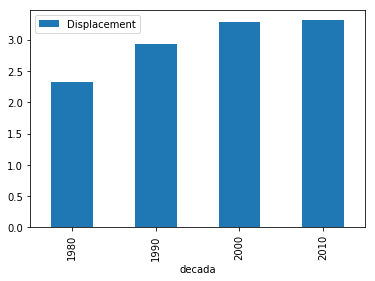

In [233]:
%matplotlib inline
coches_caros.groupby("decada").agg({"Displacement":"mean"}).plot.bar()

,Displacement,cylinders
decada,,
1980,2.320952,5.266667
1990,2.936620,6.288732
2000,3.277694,6.511278
2010,3.308443,6.469657


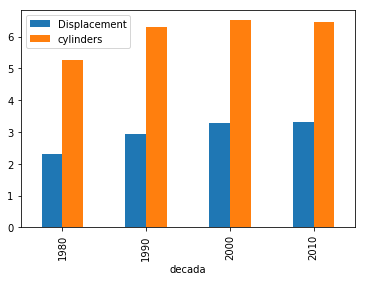

In [237]:
q = coches_caros.groupby("decada").agg({
        "Displacement":"mean", 
        "cylinders":"mean"
})
display(q)
q.plot.bar()

In [242]:
coches_caros.groupby(['year']).max()

,Displacement,Manufacturer,UCity,UCityA,UHighway,UHighwayA,VClass,barrels08,barrelsA08,c240Dscr,...,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,startStop,trany,youSaveSpend,modified,decada
year,,,,,,,,,,,,,,,,,,,,,
1984,4.8,Lamborghini,27.0000,0.0000,40.0000,0.0000,Two Seaters,29.964545,0.000000,NaN,...,0,0.0,0.00,0.0,0.00,NaN,Manual,-250,HOLA,1980
1985,2.2,Audi,27.0000,0.0000,38.0000,0.0000,Subcompact Cars,19.388824,0.000000,NaN,...,0,0.0,0.00,0.0,0.00,NaN,Manual,-250,HOLA,1980
1986,5.2,Lamborghini,27.7778,0.0000,39.0000,0.0000,Two Seaters,47.087143,0.000000,NaN,...,0,0.0,0.00,0.0,0.00,NaN,Manual,-250,HOLA,1980
1987,5.2,Lamborghini,27.7778,0.0000,39.0000,0.0000,Two Seaters,47.087143,0.000000,NaN,...,0,0.0,0.00,0.0,0.00,NaN,Manual,-250,HOLA,1980
1988,5.2,Lamborghini,26.0000,0.0000,38.0000,0.0000,Two Seaters,47.087143,0.000000,NaN,...,0,0.0,0.00,0.0,0.00,NaN,Manual,-750,HOLA,1980
1989,5.2,Lamborghini,25.0000,0.0000,39.0000,0.0000,Two Seaters,47.087143,0.000000,NaN,...,0,0.0,0.00,0.0,0.00,NaN,Manual,-750,HOLA,1980
1990,5.7,Lamborghini,25.0000,0.0000,39.0000,0.0000,Two Seaters,47.087143,0.000000,NaN,...,0,0.0,0.00,0.0,0.00,NaN,Manual,-750,HOLA,1990
1991,5.7,Lamborghini,22.0000,0.0000,33.0000,0.0000,Two Seaters,32.961000,0.000000,NaN,...,0,0.0,0.00,0.0,0.00,NaN,Manual,-1500,HOLA,1990
1992,5.7,Lamborghini,22.0000,0.0000,33.3333,0.0000,Two Seaters,32.961000,0.000000,NaN,...,0,0.0,0.00,0.0,0.00,NaN,Manual,-1500,HOLA,1990


In [252]:
def fn(value):
    return "Small" if value <= 4 else "Big"
    
coches_caros["displ_cat"] = coches_caros.Displacement.apply(fn)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [253]:
coches_caros

,Displacement,Manufacturer,UCity,UCityA,UHighway,UHighwayA,VClass,atvType,barrels08,barrelsA08,...,sCharger,startStop,tCharger,trans_dscr,trany,year,youSaveSpend,modified,decada,displ_cat
0,5.2,Lamborghini,7.0000,0.00,13.0000,0.00,Two Seaters,NaN,47.087143,0.000000,...,NaN,NaN,NaN,NaN,Manual,1989,-22250,ADIOS,1980,Big
1,5.2,Lamborghini,7.0000,0.00,13.0000,0.00,Two Seaters,NaN,47.087143,0.000000,...,NaN,NaN,NaN,NaN,Manual,1986,-22250,ADIOS,1980,Big
2,5.2,Lamborghini,7.0000,0.00,13.0000,0.00,Two Seaters,NaN,47.087143,0.000000,...,NaN,NaN,NaN,NaN,Manual,1988,-22250,ADIOS,1980,Big
3,5.2,Lamborghini,7.0000,0.00,13.0000,0.00,Two Seaters,NaN,47.087143,0.000000,...,NaN,NaN,NaN,NaN,Manual,1987,-22250,ADIOS,1980,Big
4,5.2,Lamborghini,7.0000,0.00,13.0000,0.00,Two Seaters,NaN,47.087143,0.000000,...,NaN,NaN,NaN,NaN,Manual,1990,-22250,ADIOS,1990,Big
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36120,2.0,Audi,38.8462,0.00,60.1000,0.00,Small Station Wagons,Diesel,11.240735,0.000000,...,NaN,NaN,T,NaN,Automatico,2010,1500,HOLA,2010,Small
36735,2.0,Audi,35.0000,0.00,52.1998,0.00,Compact Cars,NaN,10.632581,0.000000,...,NaN,N,T,NaN,Automatico,2017,250,HOLA,2010,Small
36804,2.0,Audi,41.0359,0.00,61.6186,0.00,Subcompact Cars,Diesel,10.616250,0.000000,...,NaN,N,T,NaN,Automatico,2015,1750,HOLA,2010,Small
37630,1.4,Audi,43.6000,114.96,52.0000,123.00,Compact Cars,Plug-in Hybrid,5.863280,3.971205,...,NaN,Y,T,NaN,Automatico,2016,1750,HOLA,2010,Small


In [275]:
def fn(colSeries):
    return  colSeries*3
coches_caros[["year","Manufacturer"]].apply(fn)

,year,Manufacturer
0,5967,LamborghiniLamborghiniLamborghini
1,5958,LamborghiniLamborghiniLamborghini
2,5964,LamborghiniLamborghiniLamborghini
3,5961,LamborghiniLamborghiniLamborghini
4,5970,LamborghiniLamborghiniLamborghini
...,...,...
36120,6030,AudiAudiAudi
36735,6051,AudiAudiAudi
36804,6045,AudiAudiAudi
37630,6048,AudiAudiAudi


In [276]:
def fn(rowSeries):
    return  str(rowSeries.year) + rowSeries.Manufacturer
coches_caros[["year","Manufacturer"]].apply(fn, axis=1)

0        1989Lamborghini
1        1986Lamborghini
2        1988Lamborghini
3        1987Lamborghini
4        1990Lamborghini
              ...       
36120           2010Audi
36735           2017Audi
36804           2015Audi
37630           2016Audi
37632           2016Audi
Length: 1025, dtype: object

In [279]:
def fn(rowSeries):
    return ("A","B")
coches_caros[["year","Manufacturer"]].apply(fn, axis=1,result_type="broadcast")

,year,Manufacturer
0,A,B
1,A,B
2,A,B
3,A,B
4,A,B
...,...,...
36120,A,B
36735,A,B
36804,A,B
37630,A,B
